In [ ]:
import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv('UNSW_NB15_testing-set.csv')
df2 = pd.read_csv('UNSW_NB15_training-set.csv')

# Concatenate the two dataframes vertically
concatenated_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Write the concatenated dataframe to a new CSV file
concatenated_df.to_csv('concatenated_file.csv', index=False)

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import  OneHotEncoder
import numpy as np

import numpy as np

from sklearn.impute import SimpleImputer

from sklearn.metrics import  classification_report, confusion_matrix


In [2]:
# Load the dataset
data = pd.read_csv("concatenated_file.csv")

In [3]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
# Preprocessing
data.drop('ct_ftp_cmd',axis = 1, inplace=True)
data.drop('dbytes',axis = 1,inplace = True)
data.drop('sloss',axis = 1,inplace = True)
data.drop('dloss',axis = 1, inplace=True)
data.drop('dwin',axis = 1, inplace=True)
data.drop('ct_srv_dst',axis = 1, inplace=True)


In [5]:
data['proto'] = data['proto'].astype('category')

data['proto'] = data['proto'].cat.codes
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,-,FIN,6,4,258,74.087490,252,...,1,1,1,1,0,0,1,0,Normal,0
1,2,0.649902,113,-,FIN,14,38,734,78.473372,62,...,1,1,1,2,0,0,1,0,Normal,0
2,3,1.623129,113,-,FIN,8,16,364,14.170161,62,...,2,1,1,3,0,0,2,0,Normal,0
3,4,1.681642,113,ftp,FIN,12,12,628,13.677108,62,...,2,1,1,3,1,0,2,0,Normal,0
4,5,0.449454,113,-,FIN,10,6,534,33.373826,254,...,2,2,1,40,0,0,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,119,-,INT,2,0,104,200000.005100,254,...,2,1,1,2,0,0,2,0,Normal,0
257669,82329,1.106101,113,-,FIN,20,8,18062,24.410067,254,...,2,1,1,1,0,0,3,0,Normal,0
257670,82330,0.000000,6,-,INT,1,0,46,0.000000,0,...,1,1,1,1,0,0,1,1,Normal,0
257671,82331,0.000000,6,-,INT,1,0,46,0.000000,0,...,1,1,1,1,0,0,1,1,Normal,0


In [6]:
smap = {'FIN':0,'INT':1,'CON':2,'REQ':3,'RST':4,'ECO':5 ,'ACC':6 ,'PAR':7,'URN':8,'no':9 ,'CLO':10}
data['state'] = data['state'].map(smap)

In [7]:
data.drop('service',axis = 1,inplace= True)

In [8]:
le = LabelEncoder()
data['attack_cat_num'] = le.fit_transform(data['attack_cat'])
data.drop(columns=['attack_cat'], inplace=True)

In [9]:
data.drop('label',axis = 1,inplace= True)

In [10]:
data.head(10)

,id,dur,proto,state,spkts,dpkts,sbytes,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,label,attack_cat_num
0,1,0.121478,113,0,6,4,258,74.087490,252,254,...,1,1,1,1,0,0,1,0,0,6
1,2,0.649902,113,0,14,38,734,78.473372,62,252,...,1,1,1,2,0,0,1,0,0,6
2,3,1.623129,113,0,8,16,364,14.170161,62,252,...,2,1,1,3,0,0,2,0,0,6
3,4,1.681642,113,0,12,12,628,13.677108,62,252,...,2,1,1,3,1,0,2,0,0,6
4,5,0.449454,113,0,10,6,534,33.373826,254,252,...,2,2,1,40,0,0,2,0,0,6
5,6,0.380537,113,0,10,6,534,39.417980,254,252,...,2,2,1,40,0,0,2,0,0,6
6,7,0.637109,113,0,10,8,534,26.683033,254,252,...,1,1,1,40,0,0,1,0,0,6
7,8,0.521584,113,0,10,8,534,32.593026,254,252,...,3,3,1,40,0,0,3,0,0,6
8,9,0.542905,113,0,10,8,534,31.313031,254,252,...,3,3,1,40,0,0,3,0,0,6
9,10,0.258687,113,0,10,6,534,57.985135,254,252,...,3,3,1,40,0,0,3,0,0,6


In [11]:
data.dtypes

id                     int64
dur                  float64
proto                  int16
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login           int64
ct_flw_http_mthd       int64
ct_src_ltm    

In [12]:
# Split the data into features and labels
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [13]:
# Impute missing values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

In [14]:
# Scale the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test set
y_pred = clf.predict(X_test)
#y_prob = clf.predict_proba(X_test)[:,1] # probability of being an attack



In [18]:
# Calculate the probability of each class for each sample
y_proba = clf.predict_proba(X_test)

# Calculate the trust score for each sample
trust_scores = np.zeros(len(X_test))
for i in range(len(X_test)):
    class_probs = y_proba[i]
    max_prob = np.max(class_probs)
    trust_scores[i] = max_prob / np.sum(class_probs)

In [19]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Trust Score:', trust_scores)


Accuracy: 0.8585039293683904
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.18      0.18       519
           1       0.12      0.12      0.12       468
           2       0.39      0.37      0.38      3292
           3       0.74      0.78      0.76      9080
           4       0.83      0.81      0.82      4831
           5       0.99      0.98      0.99     11537
           6       0.97      0.98      0.98     18613
           7       0.79      0.75      0.77      2852
           8       0.64      0.54      0.59       309
           9       0.69      0.26      0.38        34

    accuracy                           0.86     51535
   macro avg       0.64      0.58      0.60     51535
weighted avg       0.86      0.86      0.86     51535

Confusion Matrix:
[[   91    99   143   103    41     0    26    16     0     0]
 [   78    58    93   145    21     5     2    65     1     0]
 [  149   105  1207  1456   136    25    19  

In [20]:
import csv
# Open a CSV file for writing and write the trust score
with open("trust_scores.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerow(["Trust Score"])
    writer.writerow([trust_scores])

In [21]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)



In [21]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [22]:
from yellowbrick.classifier import ClassificationReport

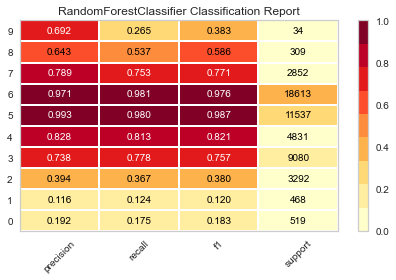

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [23]:
# Plot the classification report
classes = ['0', '1','2','3','4','5','6','7','8','9']
visualizer = ClassificationReport(clf, classes=classes, support=True,color='blue')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [25]:
!pip install --upgrade scikit-learn


In [24]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix




# Plot the confusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics._plot.confusion_matrix' (C:\Users\shris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py)

In [ ]:
from sklearn.svm import SVC
# Train and predict using the SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Calculate the probability of each class for each sample
y_proba_svm = svm.predict_proba(X_test)

# Calculate the trust score for each sample
trust_scores_svm = np.zeros(len(X_test))
for i in range(len(X_test)):
    class_probs = y_proba_svm[i]
    max_prob = np.max(class_probs)
    trust_scores_svm[i] = max_prob / np.sum(class_probs)

In [ ]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))
print('Trust Score:', trust_scores_svm)

In [ ]:
# Plot the classification report
classes = ['0', '1','2','3','4','5','6','7','8','9']
visualizer = ClassificationReport(svm, classes=classes, support=True,color='blue')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:


# Plot the confusion matrix
plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


In [29]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import xgboost as xgb
# Train XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, n_jobs=-1)
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_class=10, num_parallel_tree=None,
              objective='multi:softmax', ...)

In [26]:
# Evaluate model
y_pred_xg = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy)



Accuracy: 0.8749587658872611


In [27]:
y_proba_xg = model.predict_proba(X_test)

# Calculate the trust score for each sample
trust_scores_xg = np.zeros(len(X_test))
for i in range(len(X_test)):
    class_probs = y_proba_xg[i]
    max_prob = np.max(class_probs)
    trust_scores_xg[i] = max_prob / np.sum(class_probs)

In [28]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_xg))
print(confusion_matrix(y_test, y_pred_xg))
print('Trust Score:', trust_scores_xg)

              precision    recall  f1-score   support

           0       0.80      0.19      0.30       519
           1       0.70      0.17      0.27       468
           2       0.45      0.33      0.38      3292
           3       0.67      0.85      0.75      9080
           4       0.88      0.81      0.85      4831
           5       1.00      0.98      0.99     11537
           6       0.97      0.99      0.98     18613
           7       0.92      0.75      0.83      2852
           8       0.65      0.64      0.65       309
           9       0.70      0.56      0.62        34

    accuracy                           0.87     51535
   macro avg       0.78      0.63      0.66     51535
weighted avg       0.88      0.87      0.87     51535

[[   97    21    78   270    34     0    19     0     0     0]
 [    8    78    65   270    40     2     1     3     1     0]
 [    3     3  1073  2081    70     6    17    19    20     0]
 [    9     4   849  7730   206    22    73   135   

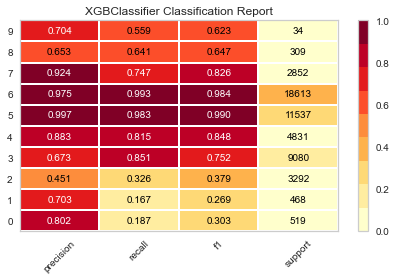

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [34]:
# Plot the classification report
classes = ['0', '1','2','3','4','5','6','7','8','9']
visualizer = ClassificationReport(model, classes=classes, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()